In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(-0.5, 269.5, 147.5, -0.5)

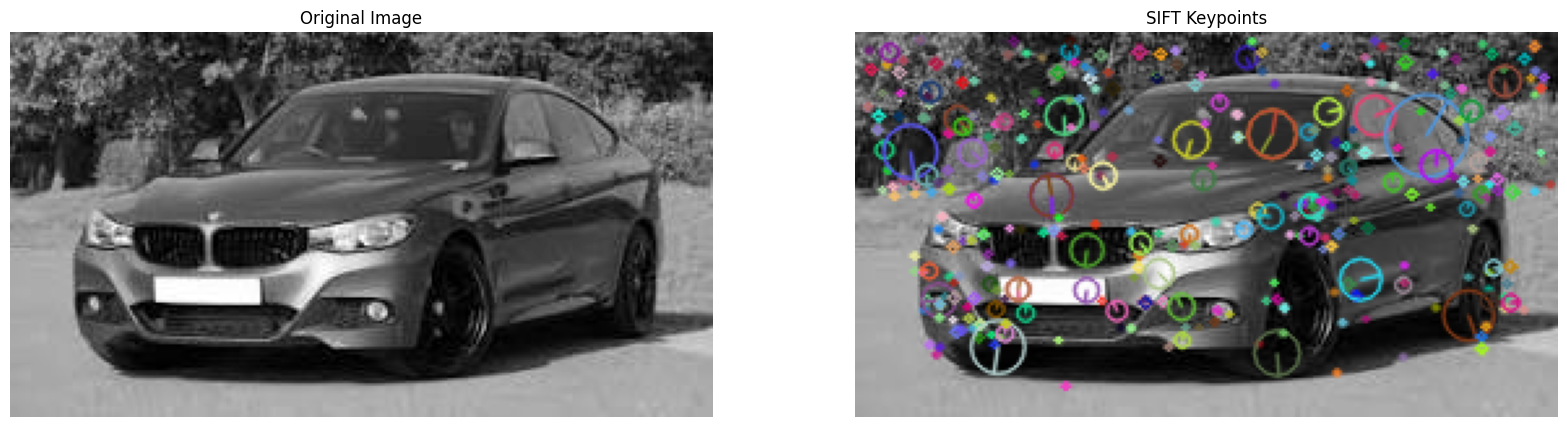

In [2]:
# Load image in grayscale
img = cv2.imread('/kaggle/input/carimage/car.jfif', cv2.IMREAD_GRAYSCALE)
if img is None:
    print("Error: Image not found.")
    exit()

# Initialize SIFT
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
keypoints, descriptors = sift.detectAndCompute(img, None)

# Draw keypoints
img_sift = cv2.drawKeypoints(img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display results
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('SIFT Keypoints')
plt.imshow(img_sift, cmap='gray')
plt.axis('off')

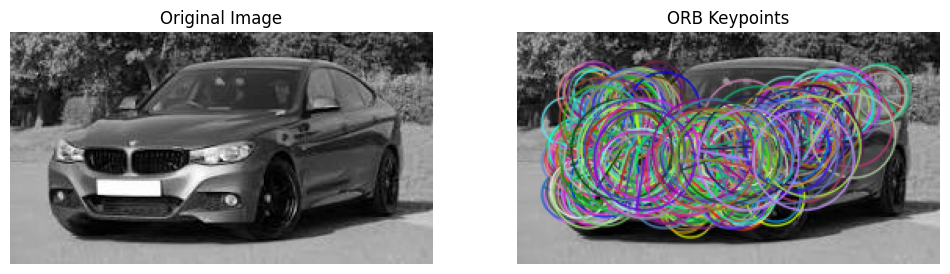

In [3]:
import cv2
import matplotlib.pyplot as plt

# Load image
img = cv2.imread('/kaggle/input/carimage/car.jfif', cv2.IMREAD_GRAYSCALE)
if img is None:
    print("Error: Image not found.")
    exit()

# Initialize ORB
orb = cv2.ORB_create(nfeatures=500)

# Detect keypoints and compute descriptors
keypoints, descriptors = orb.detectAndCompute(img, None)

# Draw keypoints
img_orb = cv2.drawKeypoints(img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('ORB Keypoints')
plt.imshow(img_orb, cmap='gray')
plt.axis('off')
plt.show()

(-0.5, 539.5, 147.5, -0.5)

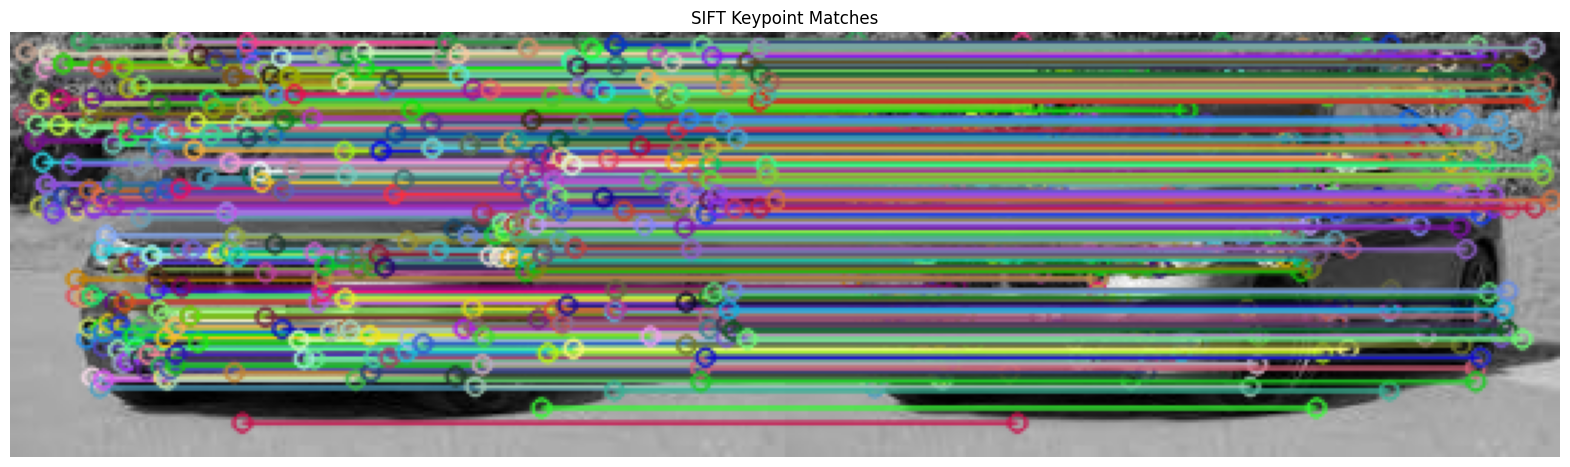

In [4]:
# Load images
img1 = cv2.imread('/kaggle/input/carimage/car.jfif', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('/kaggle/input/carimage/car.jfif', cv2.IMREAD_GRAYSCALE)
if img1 is None or img2 is None:
    print("Error: Image not found.")
    exit()

# Initialize SIFT
sift = cv2.SIFT_create()

# Detect keypoints and descriptors
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# FLANN-based matcher
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k=2)

# Apply ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Draw matches
img_matches = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None,
                              flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display result
plt.figure(figsize=(20, 10))
plt.title('SIFT Keypoint Matches')
plt.imshow(img_matches, cmap='gray')
plt.axis('off')